(1) See TOTAL_REVENUE, which includes total revenue data, and TOTAL_EXPENDITURE, which includes total spending data. Do these variables contain outliers?

 
(2) If you find outliers in the total income TOTAL_REVENUE and total expenditure TOTAL_EXPENDITURE variables, eliminate these outliers by applying the techniques you learned in this lesson and verify that no outliers remain after doing this.

 
(3) Subtract the total expenditure TOTAL_EXPENDITURE from the total income variable TOTAL_REVENUE to create a variable that can be considered as a budget deficit (without failing to contradict the outliers). Are there any outliers in this new variable? If any, clear these outliers.

 
(4) Again create a variable that can be considered as a budget deficit by subtracting the total income TOTAL_REVENUE variable from the total expenditure TOTAL_EXPENDITURE. But this time, after clearing the outliers, do this. Are there any outliers in this new variable? It is useful to clean them, if any.

 
(5) Now, we have two different budget variables that we have created in the third and fourth questions. Do you see the difference between these two?

 
(6) If the budget deficit was a very important variable for us, which method would be better to clear out contrary values. Is it the method you applied in the third question or the method in the fourth question?


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/Ahmet/Desktop/data/states_all.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [25]:
data = df[["TOTAL_REVENUE","TOTAL_EXPENDITURE"]]
data["TOTAL_REVENUE"] = data.TOTAL_REVENUE.interpolate(method='linear',limit_direction="Forward")
data["TOTAL_EXPENDITURE"] = data.TOTAL_EXPENDITURE.interpolate(method='linear',limit_direction="Forward")

<AxesSubplot:>

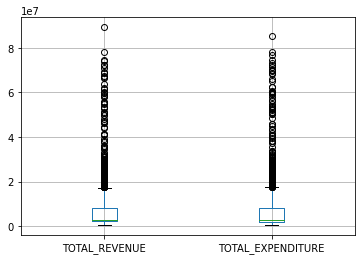

In [26]:
data.boxplot()

As we understand from boxplots for default whiskers (1.5). Two attributes contains outliers

In [27]:
from scipy.stats.mstats import winsorize

winsorized_rev = winsorize(data["TOTAL_REVENUE"], (0, 0.15))
winsorized_exp = winsorize(data["TOTAL_EXPENDITURE"], (0, 0.15))


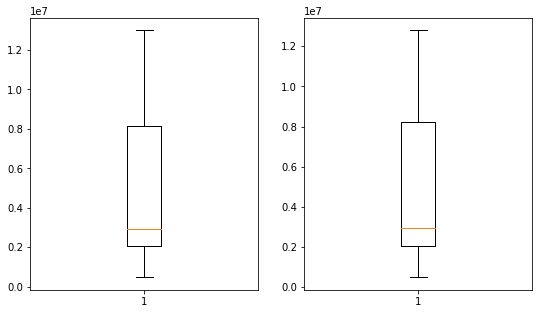

In [28]:
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
plt.boxplot(winsorized_rev)
plt.subplot(1,2,2)
plt.boxplot(winsorized_exp)
plt.show()

We got rid of from our outliers with winsorization.

In [34]:
data["budget_deficit"] = data["TOTAL_REVENUE"] - data["TOTAL_EXPENDITURE"]
data.head()

,TOTAL_REVENUE,TOTAL_EXPENDITURE,budget_deficit
0,2678885.0,2653798.0,25087.0
1,1049591.0,972488.0,77103.0
2,3258079.0,3401580.0,-143501.0
3,1711959.0,1743022.0,-31063.0
4,26260025.0,27138832.0,-878807.0


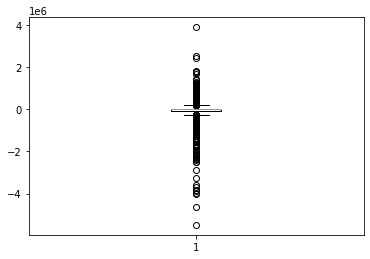

In [38]:
plt.boxplot(data.budget_deficit);

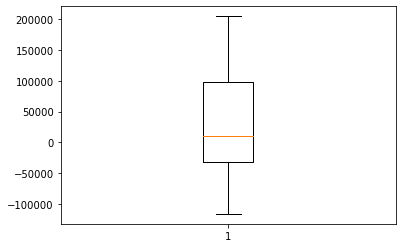

In [73]:
winsorized_bud = winsorize(data["budget_deficit"], (0.15, 0.15))
data["budget_deficit"] = winsorized_bud
plt.boxplot(winsorized_bud);

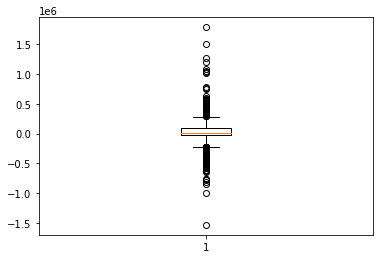

In [70]:
winsorized_data = data
winsorized_data["TOTAL_REVENUE"]  = winsorized_rev
winsorized_data["TOTAL_EXPENDITURE"] = winsorized_exp
winsorized_data.budget_deficit = winsorized_data["TOTAL_REVENUE"] - winsorized_data["TOTAL_EXPENDITURE"]
plt.boxplot(winsorized_data.budget_deficit);

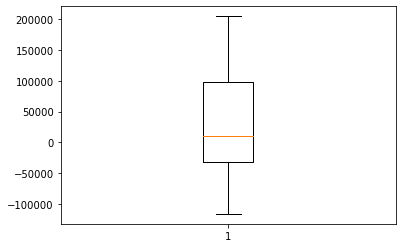

In [74]:
winsorized_bud2 = winsorize(data["budget_deficit"], (0.15, 0.15))
winsorized_data["budget_deficit"] = winsorized_bud2
plt.boxplot(winsorized_bud2);

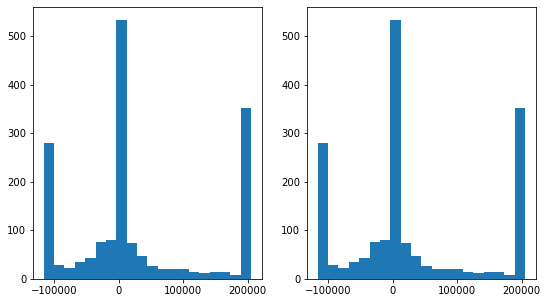

In [81]:
plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
plt.hist(data["budget_deficit"],bins=20)
plt.subplot(1,2,2)
plt.hist(winsorized_data["budget_deficit"],bins=20)
plt.show()

In [88]:
print("w Before cleaning data")
print(data["budget_deficit"].describe())
print("\n")
print("w After cleaning data")
print(winsorized_data["budget_deficit"].describe())

w Before cleaning data
count      1715.000000
mean      30308.001166
std      106850.127260
min     -116461.000000
25%      -31408.000000
50%       10440.000000
75%       97750.000000
max      205271.000000
Name: budget_deficit, dtype: float64


w After cleaning data
count      1715.000000
mean      30308.001166
std      106850.127260
min     -116461.000000
25%      -31408.000000
50%       10440.000000
75%       97750.000000
max      205271.000000
Name: budget_deficit, dtype: float64


I used winsorization to get rid of our outliers because of it both data same. There is no difference. We can use both of them, it doesn't matter.